<a href="https://colab.research.google.com/github/gonzalezcortes/NLP_with_ClimateBert/blob/main/data_04_results_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
directory = '/content/drive/My Drive/Research Papers/Climate_2022/'

In [5]:
data = pd.read_csv(directory+'detailed_results_12_05_2022-12_46_33.csv')

In [6]:
data.head()

,Company,2019,2020,2021
0,3i,0.094903,0.126298,0.098226
1,abf,0.215622,0.229207,0.298822
2,abrdn,0.185379,0.302198,0.205526
3,admiral,0.095361,0.126183,0.110902
4,anglo,0.132840,0.161278,0.177100


In [7]:
cop = data['Company'].unique()
len(cop)

100

In [8]:
cop

array(['3i', 'abf', 'abrdn', 'admiral', 'anglo', 'antofagasta', 'ashtead',
       'astra', 'auto', 'avast', 'aveva', 'aviva', 'bae', 'barclays',
       'barratt', 'bat', 'berkeley', 'bhp', 'bl', 'bnm', 'bp', 'bt',
       'bunzl', 'burberry', 'coca', 'compass', 'crh', 'croda', 'dcc',
       'dechra', 'diageo', 'electro', 'entain', 'evraz', 'experian',
       'ferguson', 'flutter', 'fresnillo', 'glencore', 'gsk', 'halma',
       'hikma', 'hl', 'hsbc', 'imperial', 'informa', 'intercontinental',
       'intermediate', 'international', 'intertek', 'itv', 'jd',
       'kingfisher', 'land', 'lloyds', 'lng', 'lseg', 'meggitt',
       'melrose', 'mng', 'mondi', 'national', 'natwest', 'next', 'ocado',
       'pearson', 'pershing', 'persimmon', 'phoenix', 'pm', 'prud', 'rds',
       'reckitt', 'relx', 'rento', 'rm', 'rmg', 'rolls', 'rt', 'sage',
       'sb', 'sc', 'schroders', 'segro', 'sjp', 'sk', 'sm', 'smithds',
       'smiths', 'snn', 'ss', 'sse', 'st', 'tesco', 'tw', 'unilever',
       'uu',

Name, FTSE industry

In [9]:
dict_names = {
        '3i':['3i Group plc', 'Financials'],
        'abf':['Associated British Foods plc','Consumer Staples'],
        'abrdn':['Abrdn plc','Financials'],
        'admiral':['Admiral group plc','Financials'],
        'anglo':['Anglo amercian plc','Basic Materials'],
        'antofagasta':['Antofagasta plc','Basic Materials'],
        'ashtead':['Ashtead Group plc','Industrials'],
        'astra':['AstraZeneca plc','Health Care'], 
        'auto':['Auto trader group plc','Technology'],
        'avast':['Avast plc','Technology'], 
        'aveva':['Aveva group plc','Technology'], 
        'aviva':['Aviva plc','Financials'],
        'bae':['Bae systems plc','Industrials'],
        'barclays':['Barclays plc','Financials'],
        'barratt':['Barratt Developments plc','Consumer Discretionary'],
        'bat':['British american tobacco plc','Consumer Staples'],
        'berkeley':['Berkeley group holdings (the) plc','Consumer Discretionary'],
        'bhp':['BHP Group Limited','Basic Materials'],
        'bl':['BRITISH LAND COMPANY PLC','Real Estate'],
        'bnm':['B&M EUROPEAN VALUE RETAIL S.A.','Consumer Discretionary'],
        'bp':['BP PLC','Energy'],
        'bt':['BT Group plc','Telecommunications'],
        'bunzl':['BUNZL PLC','Industrials'],
        'burberry':['BURBERRY GROUP PLC','Consumer Discretionary'],
        'coca':['Coca-Cola HBC AG','Consumer Staples'],
        'compass':['COMPASS GROUP PLC','Consumer Discretionary'],
        'crh':['CRH PLC','Industrials'],
        'croda':['Croda International Plc','Basic Materials'],
        'dcc':['DCC Plc','Industrials'],
        'dechra':['DECHRA PHARMACEUTICALS PLC','Health Care'], 
        'diageo':['DIAGEO PLC','Consumer Staples'],
        'electro':['RS Group plc','Industrials'],
        'entain':['Entain Plc','Consumer Discretionary'],
        'evraz':['EVRAZ PLC','Basic Materials'],
        'experian':['Experian plc','Industrials'],
        'ferguson':['FERGUSON PLC','Industrials'],
        'flutter':['FLUTTER ENTERTAINMENT PLC','Consumer Discretionary'],
        'fresnillo':['Fresnillo Plc','Basic Materials'],
        'glencore':['Glencore PLC','Basic Materials'],
        'gsk':['GSK PLC','Health Care'],
        'halma':['HALMA PLC','Industrials'],
        'hikma':['Hikma Pharmaceuticals Plc','Health Care'],
        'hl':['Hargreaves Lansdown Plc','Financials'],
        'hsbc':['HSBC Holdings Plc','Financials'],
        'imperial':['IMPERIAL BRANDS PLC','Consumer Staples'],
        'informa':['Informa Plc','Consumer Discretionary'],
        'intercontinental':['INTERCONTINENTAL HOTELS GROUP PLC','Consumer Discretionary'],
        'intermediate':['Intermediate Capital Group Plc','Financials'],
        'international':['INTERNATIONAL CONSOLIDATED AIRLINES GROUP S.A.','Consumer Discretionary'],
        'intertek':['INTERTEK GROUP PLC','Industrials'],
        'itv':['ITV PLC','Consumer Discretionary'],
        'jd':['JD SPORTS FASHION PLC','Consumer Discretionary'],
        'kingfisher':['Kingfisher plc','Consumer Discretionary'],
        'land':['LAND SECURITIES GROUP PLC','Real Estate'],
        'lloyds':['Lloyds Banking Group Plc','Financials'],
        'lng':['Legal & General Group PLC','Financials'],
        'lseg':['London Stock Exchange Group Plc','Financials'],
        'meggitt':['Meggitt PLC ','Industrials'],
        'melrose':['MELROSE INDUSTRIES PLC','Industrials'],
        'mng':['M&G plc','Financials'],
        'mondi':['MONDI PLC','Industrials'],
        'national':['National Grid plc','Utilities'],
        'natwest':['NatWest Group plc','Financials'],
        'next':['Next Plc','Consumer Discretionary'],
        'ocado':['Ocado Group Plc','Consumer Staples'],
        'pearson':['PEARSON PLC','Consumer Discretionary'],
        'pershing':['Pershing Square Holdings Ltd','Financials'],
        'persimmon':['PERSIMMON PLC','Consumer Discretionary'],
        'phoenix':['Phoenix Group Holdings','Financials'],
        'pm':['Polymetal International Plc','Basic Materials'],
        'prud':['Prudential Plc','Financials'],
        'rds':['Shell Plc','Energy'],
        'reckitt':['Reckitt Benckiser Group Plc','Consumer Staples'],
        'relx':['RELX PLC','Consumer Discretionary'],
        'rento':['RENTOKIL INITIAL PLC','Industrials'],
        'rm':['RIGHTMOVE PLC','Real Estate'],
        'rmg':['INTERNATIONAL DISTRIBUTIONS SERVICES PLC','Industrials'],
        'rolls':['Rolls-Royce Holdings Plc','Industrials'],
        'rt':['Rio Tinto Plc','Basic Materials'],
        'sage':['Sage Group Plc (The)','Technology'],
        'sb':['J Sainsbury PLC','Consumer Staples'], 
        'sc':['STANDARD CHARTERED PLC','Financials'],
        'schroders':['SCHRODERS PLC','Financials'],
        'segro':['Segro PLC (REIT)','Real Estate'],
        'sjp':['ST. JAMES´S PLACE PLC','Financials'],
        'sk':['SMURFIT KAPPA GROUP PLC','Industrials'],
        'sm':['SCOTTISH MORTGAGE INVESTMENT TRUST PLC','Financials'],
        'smithds':['DS Smith Plc','Industrials'],
        'smiths':['Smiths Group Plc','Industrials'],
        'snn':['SMITH & NEPHEW PLC','Health Care'],
        'ss':['SPIRAX-SARCO ENGINEERING PLC','Industrials'],
        'sse':['SSE PLC','Utilities'],
        'st':['Severn Trent Plc','Utilities'],
        'tesco':['Tesco PLC','Consumer Staples'],
        'tw':['TAYLOR WIMPEY PLC','Consumer Discretionary'],
        'unilever':['Unilever Plc','Consumer Staples'],
        'uu':['United Utilities Group Plc','Utilities'],
        'vodafone':['Vodafone Group Plc','Telecommunications'],
        'whitbread':['Whitbread Plc','Consumer Discretionary'],
        'wpp':['WPP PLC','Consumer Discretionary']}

In [10]:
years = ['2019','2020','2021']

In [11]:
data['change'] = ((data['2021']-data['2019'])/data['2019'])*100

In [12]:
data['Company_name'] = data['Company'].map(lambda x: dict_names[x][0].lower())
data['FTSE industry'] = data['Company'].map(lambda x: dict_names[x][1].lower())

In [13]:
data.drop([42], inplace = True )

In [14]:
data

,Company,2019,2020,2021,change,Company_name,FTSE industry
0,3i,0.094903,0.126298,0.098226,3.501592,3i group plc,financials
1,abf,0.215622,0.229207,0.298822,38.586116,associated british foods plc,consumer staples
2,abrdn,0.185379,0.302198,0.205526,10.868038,abrdn plc,financials
3,admiral,0.095361,0.126183,0.110902,16.297501,admiral group plc,financials
4,anglo,0.132840,0.161278,0.177100,33.318654,anglo amercian plc,basic materials
...,...,...,...,...,...,...,...
95,unilever,0.056578,0.064566,0.071429,26.247166,unilever plc,consumer staples
96,uu,0.028504,0.037274,0.047745,67.502981,united utilities group plc,utilities
97,vodafone,0.012653,0.014013,0.019367,53.058600,vodafone group plc,telecommunications
98,whitbread,0.028378,0.027190,0.024623,-13.230055,whitbread plc,consumer discretionary


In [15]:
data[data['FTSE industry']=='financials']

,Company,2019,2020,2021,change,Company_name,FTSE industry
0,3i,0.094903,0.126298,0.098226,3.501592,3i group plc,financials
2,abrdn,0.185379,0.302198,0.205526,10.868038,abrdn plc,financials
3,admiral,0.095361,0.126183,0.110902,16.297501,admiral group plc,financials
11,aviva,0.154860,0.170492,0.233586,50.836826,aviva plc,financials
13,barclays,0.132168,0.091166,0.177697,34.447750,barclays plc,financials
43,hsbc,0.032324,0.026569,0.036332,12.399368,hsbc holdings plc,financials
47,intermediate,0.033950,0.029259,0.036991,8.959725,intermediate capital group plc,financials
54,lloyds,0.022031,0.037047,0.077587,252.166408,lloyds banking group plc,financials
55,lng,0.032337,0.047069,0.059371,83.598706,legal & general group plc,financials
56,lseg,0.015854,0.037816,0.041948,164.596741,london stock exchange group plc,financials


In [16]:
data_grouped = data.groupby(['FTSE industry']).mean()
data_grouped.round(4)

,2019,2020,2021,change
FTSE industry,,,,
basic materials,0.1083,0.1197,0.1225,36.0767
consumer discretionary,0.0380,0.0404,0.0586,137.8817
consumer staples,0.0717,0.0745,0.1061,130.2375
energy,0.1205,0.1521,0.1615,50.1158
financials,0.0468,0.0606,0.0683,149.2779
health care,0.0560,0.0955,0.1203,293.0879
industrials,0.0503,0.0675,0.0849,469.2954
real estate,0.0295,0.0458,0.0546,113.8408
technology,0.0059,0.0096,0.0908,1535.3566


In [17]:
#data

In [18]:
#data

In [19]:
data_time_series = data.drop(columns=['change', 'Company'])
#data_time_series

In [20]:
data_time_series = pd.melt(data, id_vars=['Company_name','FTSE industry'], value_vars=['2019', '2020', '2021'], var_name="Year", value_name="Value")

[Text(0.5, 1.0, 'Evolution through the years')]

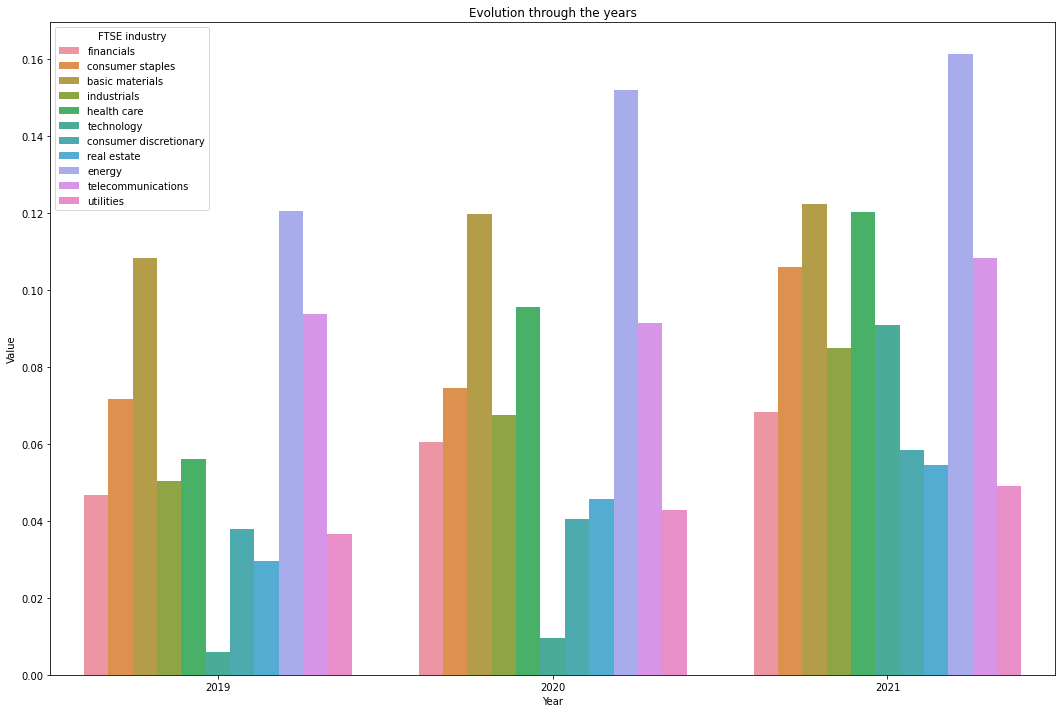

In [21]:
import seaborn as sns
#sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(18, 12))
# Load an example dataset with long-form data

# Plot the responses for different events and regions
sns.barplot(x="Year", y="Value",
             hue="FTSE industry",
             data=data_time_series, ci=None).set(title='Evolution through the years')

[Text(0.5, 1.0, 'Evolution through the years')]

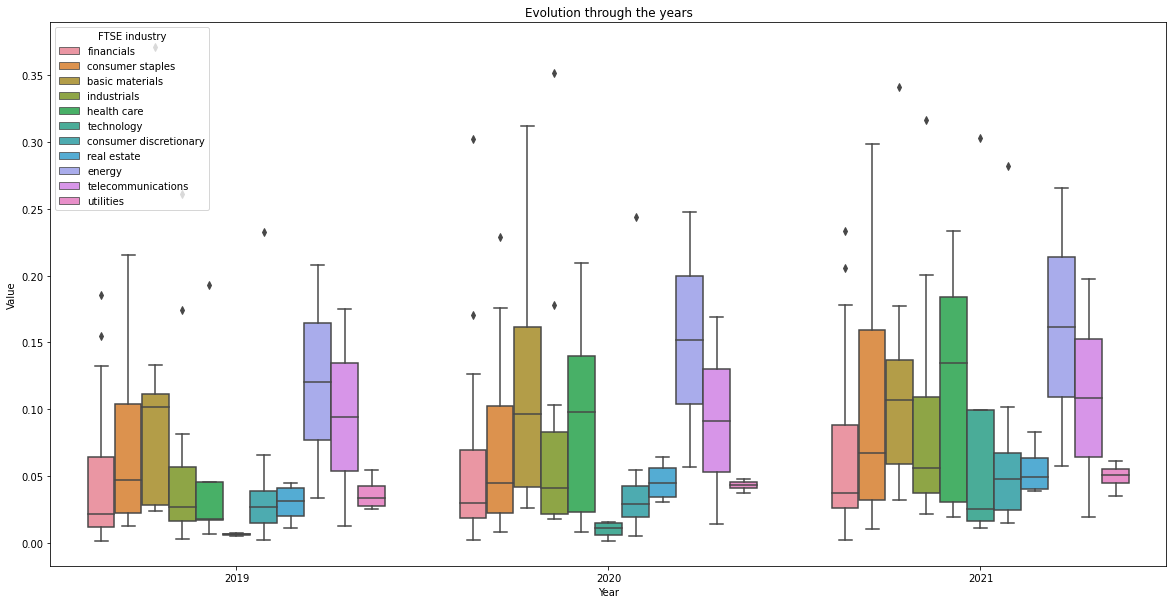

In [22]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x="Year", y="Value",
             hue="FTSE industry",
             data=data_time_series).set(title='Evolution through the years')

[Text(0.5, 1.0, 'Average change between 2019 and 2021')]

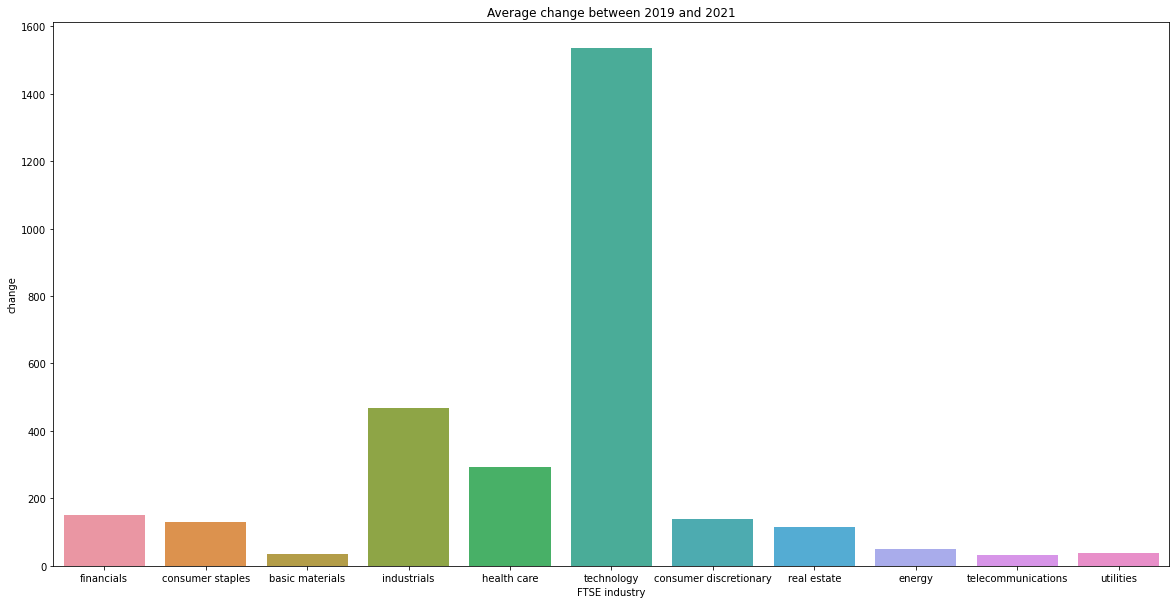

In [23]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=data, x="FTSE industry", y="change",ci=None).set(title='Average change between 2019 and 2021')

In [24]:
#path = '/content/drive/My Drive/Research Papers/Climate_2022/detailed_results_b_'
#time_string = time.strftime("%m_%d_%Y-%H_%M_%S", time.localtime())
#data.to_csv(path+time_string+'.csv')